# Part-1: Data Exploration and Pre-processing

Importing the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1) Load the given dataset.

In [2]:
cd E:\Data Sci\Machince_Langauage\Ass

E:\Data Sci\Machince_Langauage\Ass


In [3]:
data = pd.read_excel("Ass-7.xlsx")

In [4]:
data

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


2) Check for the null values.

In [5]:
data.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

3) Get basic information from data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


4) Describe the dataset.

In [7]:
data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


5) Display scatterplot between age & Total work Experience.

In [8]:
x = data['Age']
y = data['Total Work Experience']

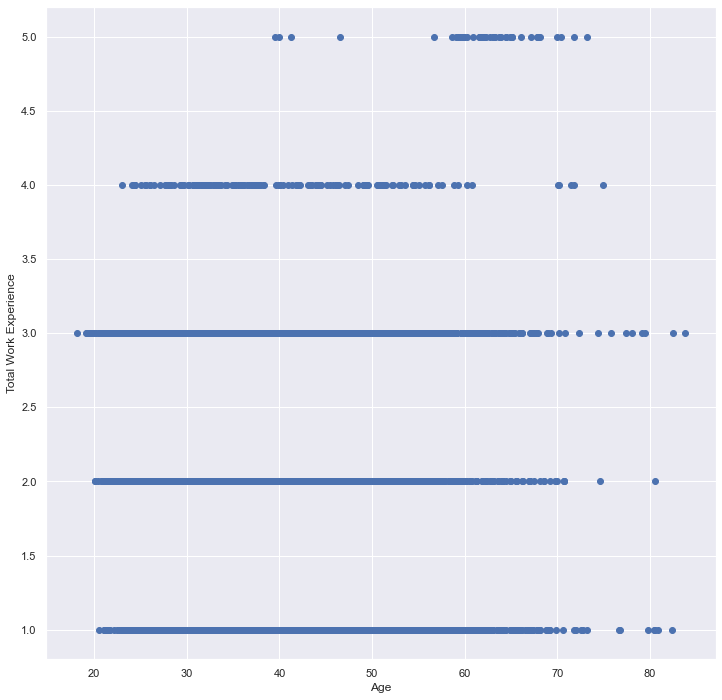

In [14]:
plt.figure(figsize = (12,12))
plt.xlabel("Age")
plt.ylabel("Total Work Experience")
plt.scatter(x,y)
plt.show()

6) Display box plot for age.

<AxesSubplot:>

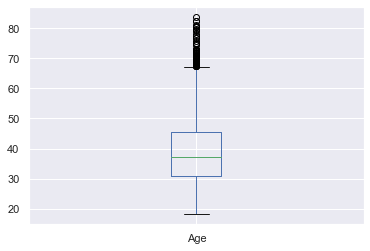

In [17]:
data['Age'].plot(kind = 'box')

7) Display box plot for Cibil score.

<AxesSubplot:>

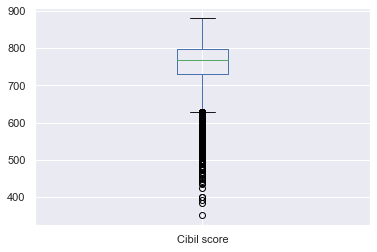

In [18]:
data['Cibil score'].plot(kind = 'box')

8) Create target and features data where target is Total bounces past12months.

In [20]:
Y = data['Total bounces past12months']
X = data.drop(["Total bounces past12months"],axis =1)

In [21]:
print("Feature:- ",X.shape)
print("Target:- ",Y.shape)

Feature:-  (8995, 6)
Target:-  (8995,)


# Part-2: Working with Model

1) Split data into training and testing sets.

We will use Scaler

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [23]:
cols = X.columns

In [25]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 13)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [28]:
print("Shape of Training data for X:- ",X_train.shape)
print("Shape of Training data for Y:- ",Y_train.shape)
print("Shape of Testing data for X:- ",X_test.shape)
print("Shape of Testing data for Y:- ",Y_test.shape)

Shape of Training data for X:-  (7196, 6)
Shape of Training data for Y:-  (7196,)
Shape of Testing data for X:-  (1799, 6)
Shape of Testing data for Y:-  (1799,)


2) Create a KNN classifier between Features and target data.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model = KNeighborsClassifier(1)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

3) Display the test score.

In [32]:
model.score(X_test,Y_test)

0.5714285714285714

4) Display the training score.

In [33]:
model.score(X_train,Y_train)

1.0

5) Print the accuracy score.

In [34]:
Y_pre = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(Y_test,Y_pre)

0.5714285714285714

# Model is Overfitting

6) Try 1 to 14 k values for classifier.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    model = KNeighborsClassifier(i)
    model.fit(X_train,Y_train)
    train_scores.append(model.score(X_train,Y_train))
    test_scores.append(model.score(X_test,Y_test))

7) Display training and testing score for all the 1 to 14 k values.

In [43]:
print("Traing Score:- ",train_scores)
print("Testing Score:- ",test_scores)

Traing Score:-  [1.0, 0.7879377431906615, 0.7547248471372985, 0.7399944413563091, 0.7338799332962757, 0.7267926625903279, 0.7248471372984991, 0.7220678154530294, 0.716787103946637, 0.7163702056698166, 0.712201222901612, 0.712757087270706, 0.7110894941634242, 0.7090050027793219]
Testing Score:-  [0.5714285714285714, 0.6575875486381323, 0.6553640911617565, 0.6614785992217899, 0.6681489716509171, 0.6725958866036688, 0.6742634797109506, 0.6737076153418566, 0.6720400222345748, 0.6748193440800445, 0.6814897165091718, 0.6826014452473597, 0.6826014452473597, 0.6848249027237354]


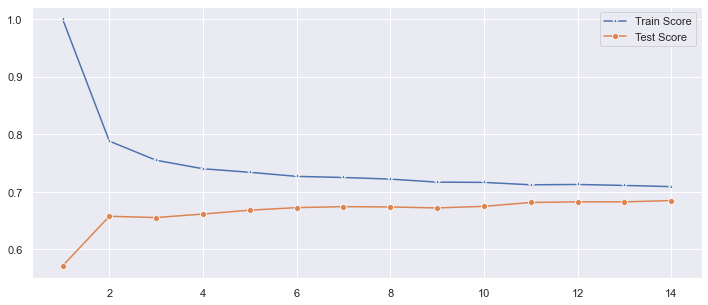

In [39]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [41]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(14)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=14)

In [46]:
print("Training Score:- ",knn.score(X_train,Y_train))

Training Score:-  0.7090050027793219


In [47]:
print("Testing Score:- ",knn.score(X_test,Y_test))

Testing Score:-  0.6848249027237354


In [50]:
Y_pred_1 = knn.predict(X_test)

In [51]:
accuracy_score(Y_test,Y_pred_1)

0.6848249027237354